<a href="https://colab.research.google.com/github/lifelonglearnerit/numerical_methods/blob/main/mass_spring_runge_kutta_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#x = int(input('wprowadz wychylenie x: ')) # wychylenie z polozenia rownowagi 
#v = int(input('wprowadz predkosc v: '))   # predkosc 
#k = int(input('wprowadz wspolczynnik sprezystosci k: ') ) # sprezystosc
#c = int(input('wprowadz wspolczynnik tlumienia c: ')) # tlumienie
x0 = 20.0
v0 = 0.0
k = 50.0
c = 15.0
m = 10
dt = 0.1 # krok calkowania
t0 = 0.0
t_stop = 1000


In [ ]:
x = [] # dziedzina funkcji 
v = [] 
t = []
x.append(x0)
v.append(v0)
t.append(t0)

$Solution \ Euler \ method: \\
x'' = acceleration \\
x' = velocity \ v \\
x = initial \ dissplacement \\ 
$ 

$Differential \ equations: \\
x(t_0) = x_0 \\
x' = v \\ 
v' = -\frac{k}{m}· x -\frac{c}{m}·v$

In [ ]:
def f(x: float, v: float) -> float:
    accel = -(k/m) * x -(c/m) * v
    return accel

$x_{n+1} = x_n + Δt · v_n \\
v_{n+1} = v_n + Δt (-\frac{k}{m}· x_n -\frac{c}{m}·v_n)$ 

$ma = -kx -cv \\ 
x' = v \\ 
v' = -\frac{k}{m}· x -\frac{c}{m}·v$

$Runge \ Kutta: \\
x_{n+1} = x_n + \frac{h}{6}(v_1 + 2v_2 + 2v_3 +v_4) \\
v_{n+1} = v_n + \frac{h}{6}(a_1 + 2a_2 + 2a_3 +a_4)$



In [ ]:
def rk4(k: float, m: float,  x: list, c: float, v: list, t:list, dt: float,) -> list:
    for i in range(1, t_stop+1):
        #t
        t.append(i*dt)
        # k1
        k1_x = x[i - 1]
        k1_v = v[i - 1]
        
        # k2
        k2_x = x[i - 1] + k1_v * (dt / 2)
        k2_v = v[i - 1] + ((-k*k1_x -c*k1_v) / m) * (dt / 2)
       
        # k3
        k3_x = x[i - 1] + k2_v * (dt / 2)
        k3_v = v[i - 1] + ((-k*k2_x -c*k2_v) / m) * (dt / 2)
        
        # k4
        k4_x = x[i - 1] + k3_v * dt  
        k4_v = v[i - 1] + ((-k*k3_x -c*k3_v) / m)  * dt
       

        x.append(x[i - 1] + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v))
        v.append(v[i - 1] + (dt / 6) * (((-k*k1_x -c*k1_v) / m) + 2 * ((-k*k2_x -c*k2_v) / m) + 2 * ((-k*k3_x -c*k3_v) / m) +((-k*k4_x -c*k4_v) / m)))

    return x2, v2, t2

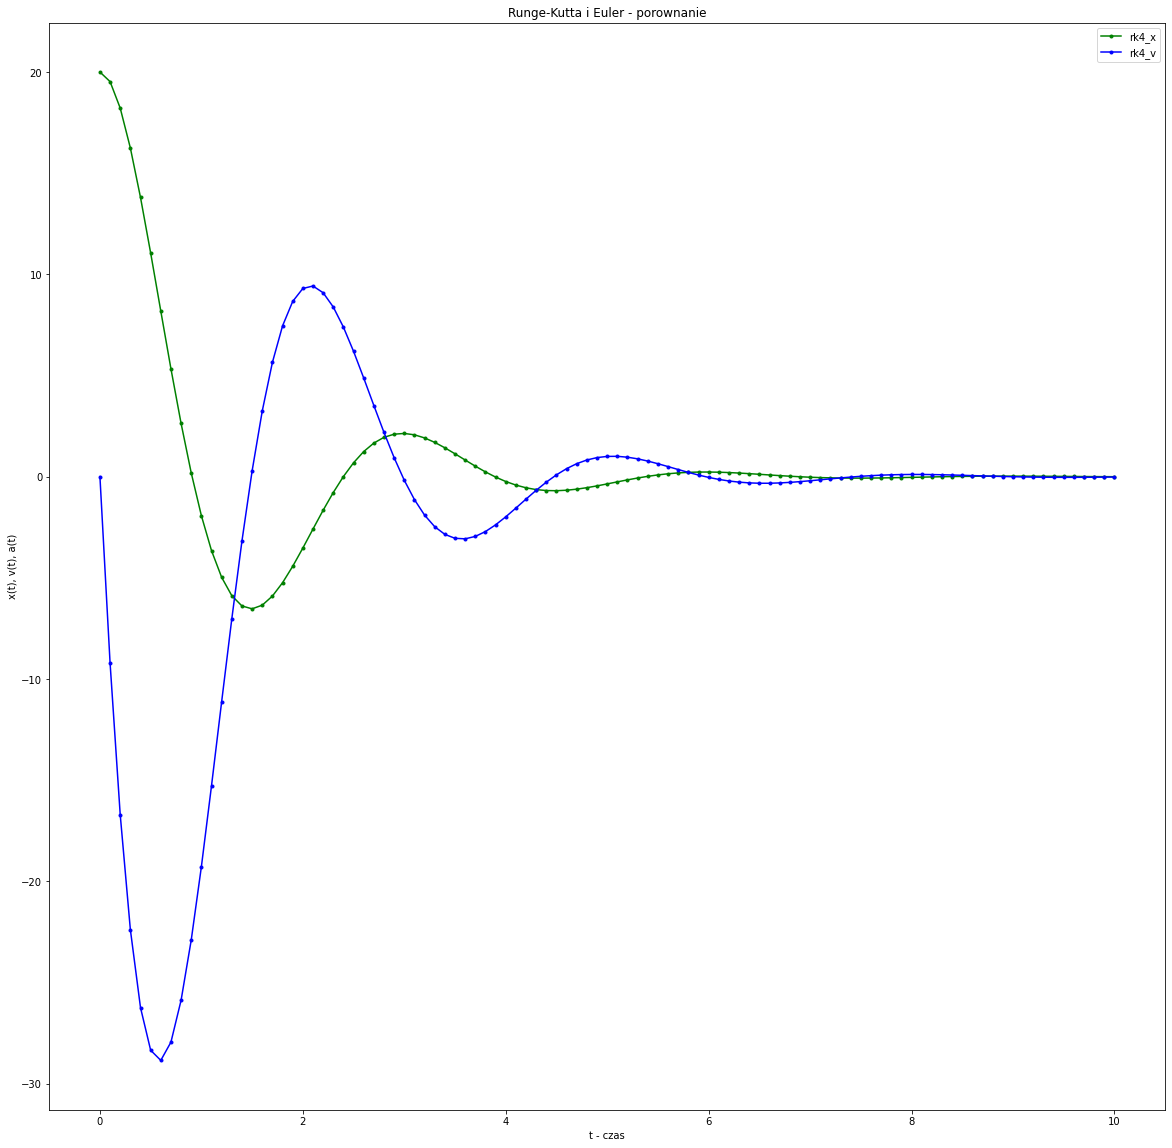

In [ ]:
rk4_x, rk4_v, rkt2 = rk4(k,m,x,c,v,t,dt)
plt.figure(figsize=(20,20))
plt.plot(rkt2, rk4_x, color='green', marker='o', markersize=3, label='rk4_x' )
plt.plot(rkt2, rk4_v, color='blue', marker='o', markersize=3, label='rk4_v' )

plt.xlabel('t - czas')
plt.ylabel('x(t), v(t), a(t)')
plt.title('Runge-Kutta i Euler - porownanie')
plt.legend()
plt.show()

In [ ]:
for rkx, rkv, rkt in zip(rk4_x, rk4_v, rkt2):
  print(rkx, '|', rkv, '|', rkt)

20.0 | 0.0 | 0.0
19.526145833333334 | -9.209010416666667 | 0.1
18.215459826687283 | -16.709559944837785 | 0.2
16.24510113395676 | -22.392805505254305 | 0.30000000000000004
13.798054899381643 | -26.249090886429652 | 0.4
11.053860095071666 | -28.35457812593211 | 0.5
8.180788158662684 | -28.85577293464577 | 0.6000000000000001
5.329631995521494 | -27.952952988213898 | 0.7000000000000001
2.6291682266770477 | -25.883418125520805 | 0.8
0.18326943935452222 | -22.905361721482127 | 0.9
-1.9304298569249863 | -19.28302245538947 | 1.0
-3.6604682919318927 | -15.273624675668 | 1.1
-4.980291571712572 | -11.116462078443398 | 1.2000000000000002
-5.88601112685768 | -7.024330910470385 | 1.3
-6.39342694722864 | -3.1773815501098475 | 1.4000000000000001
-6.534554745244339 | 0.2806640888722063 | 1.5
-6.353887060396982 | 3.244083954566476 | 1.6
-5.904598238190617 | 5.644751381945895 | 1.7000000000000002
-5.2448765715493195 | 7.4500486537882225 | 1.8
-4.434535484121176 | 8.65942933818017 | 1.9000000000000001
-3